In [1]:
# Import libraries
import csv
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('/Users/denise/Desktop/Eskwelabs/dsf11-sprint-1/data/micro_world.csv', encoding='ISO-8859-1')
data.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig
0,Afghanistan,AFG,South Asia,22647496.0,140343632,0.774286,1,19.0,2,4,...,4,4,4,4.0,4,5.0,1,2,0,0.0
1,Afghanistan,AFG,South Asia,22647496.0,167823412,0.766367,1,40.0,1,5,...,4,4,4,4.0,4,5.0,1,2,0,0.0
2,Afghanistan,AFG,South Asia,22647496.0,182483450,0.588983,1,25.0,1,1,...,4,4,4,4.0,4,5.0,1,2,0,0.0
3,Afghanistan,AFG,South Asia,22647496.0,170778240,2.572345,1,40.0,1,4,...,4,4,4,4.0,4,5.0,2,2,0,0.0
4,Afghanistan,AFG,South Asia,22647496.0,170712642,0.525471,2,27.0,3,1,...,1,4,4,4.0,4,5.0,1,1,1,0.0


# Filtering the Data

In [4]:
# Filter to SEA Data and reset the index
sea_data = data[data["regionwb"] == "East Asia & Pacific (excluding high income)"].reset_index(drop=True)
sea_data.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig
0,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,122064432,1.923940,1,63.0,1,3,...,4,4,4,4.0,2,2.0,1,2,0,0.0
1,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,138600426,0.667376,1,67.0,1,3,...,4,4,4,4.0,2,5.0,2,2,0,0.0
2,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,129028091,1.041924,1,41.0,1,2,...,4,4,4,4.0,2,5.0,2,2,0,0.0
3,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,139188390,0.542453,2,45.0,1,5,...,2,4,4,2.0,5,1.0,1,2,0,0.0
4,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,135945774,0.453226,1,30.0,1,5,...,1,4,4,4.0,2,2.0,1,1,1,0.0


In [5]:
# Create new column 'has_account' and set to False (0) by default
sea_data["has_account"] = 0

# Check if all columns have a value of 1 and set 'has_account' to True (1)
sea_data.loc[(sea_data["account_fin"] == 1) | (sea_data["account_mob"] == 1), "has_account"] = 1
sea_data.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,has_account
0,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,122064432,1.923940,1,63.0,1,3,...,4,4,4.0,2,2.0,1,2,0,0.0,0
1,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,138600426,0.667376,1,67.0,1,3,...,4,4,4.0,2,5.0,2,2,0,0.0,0
2,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,129028091,1.041924,1,41.0,1,2,...,4,4,4.0,2,5.0,2,2,0,0.0,0
3,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,139188390,0.542453,2,45.0,1,5,...,4,4,2.0,5,1.0,1,2,0,0.0,0
4,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,135945774,0.453226,1,30.0,1,5,...,4,4,4.0,2,2.0,1,1,1,0.0,1


In [6]:
# Count the value of has_account column
# 1 means that it has either an account in financial institution or mobile
sea_data["has_account"].value_counts()

1    8757
0    2822
Name: has_account, dtype: int64

In [7]:
# Count the value of female column
sea_data["female"].value_counts()

1    6235
2    5344
Name: female, dtype: int64

# EDA: What % of male and female is financially inclusive in SEA?

In [8]:
# key column to use
_key = "female"

# Create a dictionary for mapping
_map = {
    1:'female',
    2:'male'
}

In [22]:
# Group the data and apply aggregations
gender_sea_data = sea_data.groupby(['economy','female']).agg(
    has_acc=('has_account', 'sum'),
    total_population=('wpid_random', 'count')
).reset_index()

# Compute acc ownership in %
gender_sea_data['% of population has account'] = gender_sea_data['has_acc'] * 100.0 / gender_sea_data['total_population']
gender_sea_data = gender_sea_data.sort_values(['female', '% of population has account'], ascending=False)


In [39]:
# Mapping, Removed China, Show Data

gender_sea_data = gender_sea_data.replace({_key:_map})
gender_sea_data = gender_sea_data[gender_sea_data["economy"] != "China"]
gender_sea_data

,economy,female,has_acc,total_population,% of population has account
17,Thailand,male,495,501,98.80
11,Mongolia,male,388,394,98.48
9,Malaysia,male,425,458,92.79
13,Myanmar,male,363,541,67.10
15,Philippines,male,286,427,66.98
5,Indonesia,male,252,460,54.78
7,Lao PDR,male,144,353,40.79
1,Cambodia,male,103,352,29.26
10,Mongolia,female,600,606,99.01
16,Thailand,female,502,516,97.29


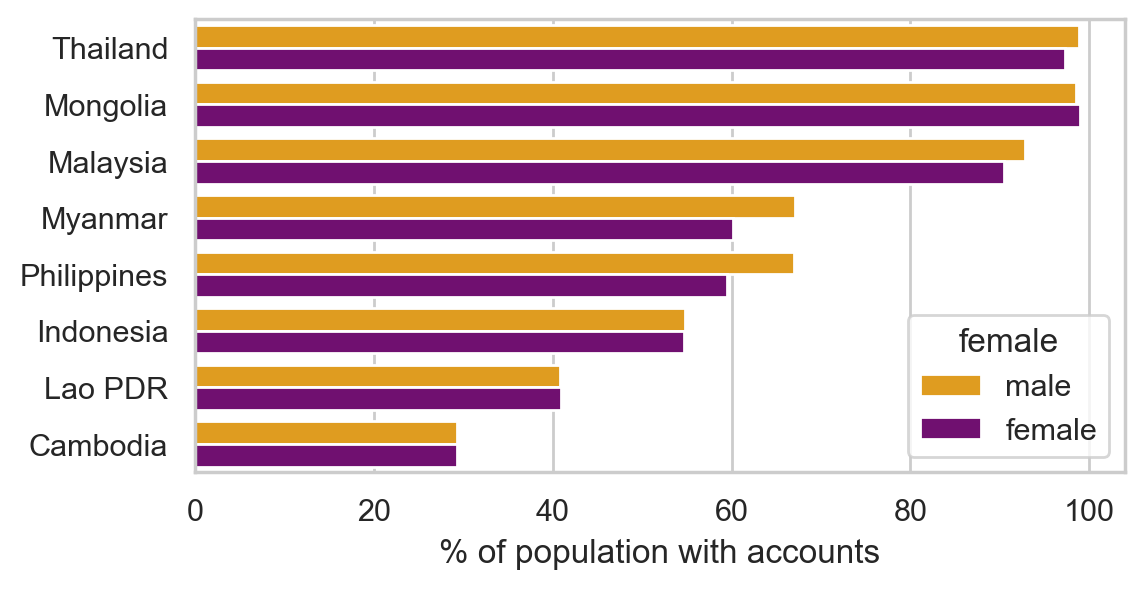

In [40]:
# Financial Inclusion Plot

sns.set_theme(style="whitegrid")
sns.set_palette("muted")


# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
a = sns.barplot(
    x = gender_sea_data['% of population has account'],
    y = gender_sea_data['economy'],
    hue = gender_sea_data['female'],
    palette = ['orange','purple'],
    orient ='h'
)

# Set title
# plt.title('Gender Gap')

# Set labels
a.set(xlabel='% of population with accounts')
a.set(ylabel= None)

# Show figure
plt.show()

# 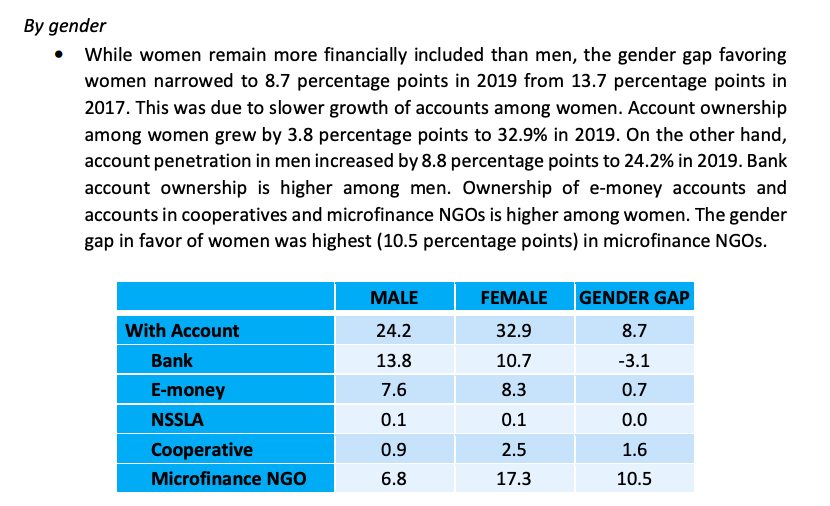

In [40]:
# link: https://www.bsp.gov.ph/Inclusive%20Finance/Financial%20Inclusion%20Reports%20and%20Publications/2019/2019FISToplineReport.pdf


# staring page 15

# Computing the gap

In [61]:
# Filtered data to male only,removed China

male_sea_data = gender_sea_data[(gender_sea_data["female"] == "male") & (gender_sea_data["economy"] != "China")]
male_sea_data = male_sea_data.sort_values(['economy'])
male_sea_data                 

,economy,female,has_acc,total_population,% of population has account
1,Cambodia,male,103,352,29.26
5,Indonesia,male,252,460,54.78
7,Lao PDR,male,144,353,40.79
9,Malaysia,male,425,458,92.79
11,Mongolia,male,388,394,98.48
13,Myanmar,male,363,541,67.10
15,Philippines,male,286,427,66.98
17,Thailand,male,495,501,98.80


In [62]:
# Filtered data to female only, removed China

female_sea_data = gender_sea_data[(gender_sea_data["female"] == "female") & (gender_sea_data["economy"] != "China")]
female_sea_data = female_sea_data.sort_values(['economy'])
female_sea_data


,economy,female,has_acc,total_population,% of population has account
0,Cambodia,female,190,648,29.32
4,Indonesia,female,329,602,54.65
6,Lao PDR,female,265,647,40.96
8,Malaysia,female,490,542,90.41
10,Mongolia,female,600,606,99.01
12,Myanmar,female,276,459,60.13
14,Philippines,female,341,573,59.51
16,Thailand,female,502,516,97.29


In [63]:
# Creating gender gap data set

gap_data = male_sea_data[['economy', '% of population has account']].reset_index(drop=True)

# Rename % of population has account column to male data
gap_data.columns = ['economy','% of male population has account']

In [83]:
# Add female info from female_sea_data

gender_gap_data = gap_data.merge(female_sea_data['% of population has account'], how='outer', on=gap_data['economy'])
gender_gap_data = gender_gap_data.drop('key_0', axis=1)

#rename columns
gender_gap_data.columns = ['country','% of male population has account','% of female population has account']

#reformat decimal place
pd.options.display.float_format = "{:,.2f}".format

gender_gap_data

,country,% of male population has account,% of female population has account
0,Cambodia,29.26,29.32
1,Indonesia,54.78,54.65
2,Lao PDR,40.79,40.96
3,Malaysia,92.79,90.41
4,Mongolia,98.48,99.01
5,Myanmar,67.10,60.13
6,Philippines,66.98,59.51
7,Thailand,98.80,97.29


# SEA Gender Gap Data Set

In [84]:
# create difference column

gender_gap_data['gender gap percentage points'] = gender_gap_data['% of male population has account'] - gender_gap_data['% of female population has account']
gender_gap_data = gender_gap_data.sort_values(['gender gap percentage points'], ascending=False)


/Users/denise/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


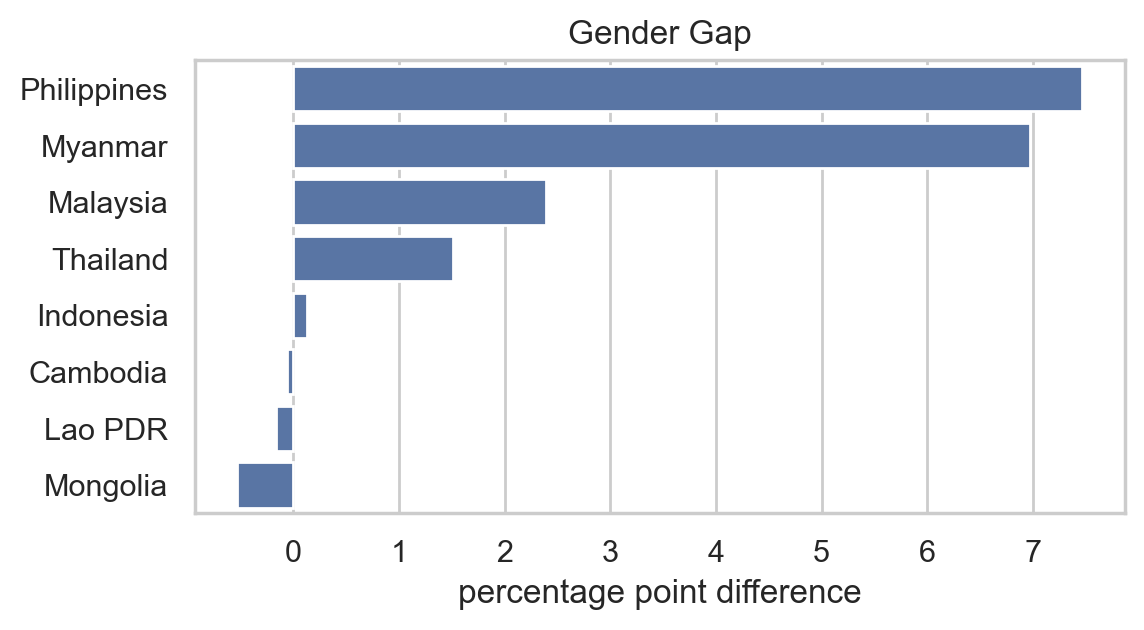

In [85]:
# Gap Plot

sns.set_theme(style="whitegrid")

# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
a = sns.barplot(
    gender_gap_data['gender gap percentage points'] ,
    gender_gap_data['country'] ,
    color='b',
    orient = 'h'
)

# Set title
plt.title('Gender Gap')

# Set labels
a.set(xlabel='percentage point difference')
a.set(ylabel= None)

# Show figure
plt.show()